Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

Loading the dataset

In [2]:
mnist = tf.keras.datasets.mnist

Splitting the dataset into training and testing

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255


Reshaping the training and testing dataset

In [4]:
x_train = x_train.reshape(-1,28,28,1)   
x_test = x_test.reshape(-1,28,28,1)

Defining the CNN Model

In [5]:
convolutional_network = tf.keras.models.Sequential([
    Conv2D(filters=25,kernel_size=(3,3),activation="relu",input_shape = (28,28,1)),MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Compiling and fitting the model

In [6]:
convolutional_network.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
convolutional_network.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2113 - accuracy: 0.9353
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0763 - accuracy: 0.9769
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0556 - accuracy: 0.9821


CNN Model Summary

In [7]:
convolutional_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

Predictions

In [8]:
predictions = convolutional_network.predict(x_test)

313/313 [==============================] - 2s 5ms/step


Loss and accuracy

In [9]:
val_loss,val_accuracy = convolutional_network.evaluate(x_test,y_test)
print("Loss:",val_loss,"Accuracy: ",val_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0545 - accuracy: 0.9838
Loss: 0.05453570559620857 Accuracy:  0.9837999939918518


In [10]:
print(np.argmax(predictions[2]))

1


Visualization of predicted output

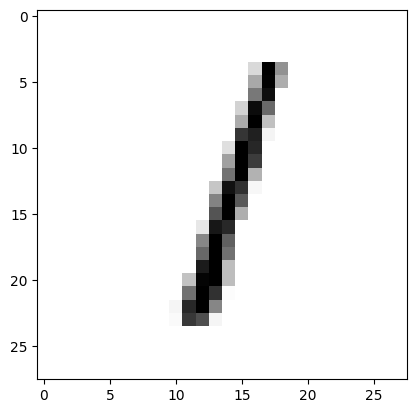

In [11]:
plt.imshow(x_test[2],cmap = plt.cm.binary)
plt.show()